<a href="https://colab.research.google.com/github/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/blob/main/09_11_24_CONSUMO_COMBUSTIVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Emissão de CO2 em Veículos**

**- Objetivo:** Prever as emissões de CO2 de um veículo com base em variáveis como tipo de combustível, cilindrada, potência do motor, peso, entre outras.

**- Dataset:** Utilizar uma base de dados de veículos que contenha atributos relevantes para as emissões. O dataset "*Car Fuel Consumption*" disponível no Kaggle, por exemplo, oferece informações úteis para este tipo de análise.

https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

Link no meu github: https://raw.githubusercontent.com/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/refs/heads/main/Fuel_Consumption_2000-2022.csv



## **1. Bibliotecas:** Carregue as bibliotecas necessárias para o projeto, como pandas, numpy, matplotlib, seaborn e sklearn.

In [ ]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **2. Carregar os Dados:** Utilize pandas para carregar a base de dados.

In [ ]:
# Carregar os Dados
df = pd.read_csv('/content/Fuel_Consumption_2000-2022.csv')  # Substitua pelo caminho do seu arquivo
df.head()

## **3. Exploração Inicial:** Faça uma análise inicial, verificando o tipo de dados de cada coluna, valores ausentes e distribuição de valores.

In [ ]:
# Exploração Inicial dos Dados
print("Informações do Dataset:")
print(df.info())
print("\nResumo Estatístico:")
print(df.describe())
print("\nValores Nulos por Coluna:")
print(df.isnull().sum())

## **4. Visualização de Dados**
- **Análise Visual:** Utilize gráficos para entender melhor as relações entre as variáveis. Algumas visualizações úteis incluem:

  - **Gráfico de dispersão (scatterplot)** para observar a relação entre cilindrada e emissão de CO2.
  - **Gráfico de barras** para categorias como tipo de combustível e suas emissões médias de CO2.
  - **Gráfico de correlação** para verificar quais variáveis têm maior relação com as emissões.

### **Gráfico de dispersão (scatterplot) para observar a relação entre cilindrada e emissão de CO2.**

In [ ]:
# Scatterplot usando seaborn para melhor visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ENGINE SIZE', y='EMISSIONS', data=df, color='b', alpha=0.6)

# Adicionar títulos e rótulos aos eixos
plt.title("Relação entre Cilindrada (Engine Size) e Emissão de CO₂")
plt.xlabel("Cilindrada (ENGINE SIZE)")
plt.ylabel("Emissão de CO₂ (EMISSIONS)")
plt.grid(True)

# Exibir o gráfico
plt.show()

### **Gráfico de barras para categorias como tipo de combustível e suas emissões médias de CO2.**

In [ ]:
# Agrupar por tipo de combustível e calcular a média de emissões de CO2
mean_emissions = df.groupby('FUEL')['EMISSIONS'].mean().sort_values()

# Configuração do tamanho e estilo do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_emissions.index, y=mean_emissions.values, palette="viridis")

# Adicionar títulos e rótulos
plt.title("Emissão Média de CO₂ por Tipo de Combustível")
plt.xlabel("Tipo de Combustível")
plt.ylabel("Emissão Média de CO₂ (g/km)")
# plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

### **Gráfico de correlação para verificar quais variáveis têm maior relação com as emissões.**

Para a matriz de correlação, só podemos utilizar dados numéricos. Então é necessário criar um novo Data Frame somente com dados numéricos.

In [ ]:
df.info()

In [ ]:
# Remover colunas categóricas que não são relevantes para a análise de correlação
df_numerico = df.select_dtypes(include=[np.number])  # Seleciona apenas colunas numéricas

In [ ]:
df_numerico.info()

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

## **5. Pré-processamento dos Dados**
- **Tratar Valores Ausentes:** Se existirem valores ausentes, remova ou preencha-os.
- **Codificação de Variáveis Categóricas:** Converta variáveis categóricas (como tipo de combustível) em variáveis numéricas usando pd.get_dummies() ou LabelEncoder.
- **Normalização ou Padronização:** Padronize as variáveis numéricas, especialmente se utilizar algoritmos sensíveis a escala, como regressão linear.

In [ ]:
df.info()

In [ ]:
# Pré-processamento dos Dados
# Remover valores nulos (ou preencher conforme necessário)
df = df.dropna()

*Para a inferência do modelo de regressão vamos utilizar somente dados numéricos que foram utilizados na matriz de correlação. Vamos utilizaar o data frame chamado df_numerico*

In [ ]:
df_numerico

In [ ]:
df_numerico.info()

Não iremos utilizar a coluna **YEAR**. Vamos removê-la e salvar o nosso novo data frame como **dados**.

In [ ]:
# Remover a coluna 'MODEL' e salvar o resultado em um novo DataFrame
dados = df_numerico.drop(columns=['YEAR'])

In [ ]:
dados



---



**BIBLIOTECA SCIKIT-LEARN**

https://scikit-learn.org/stable/index.html


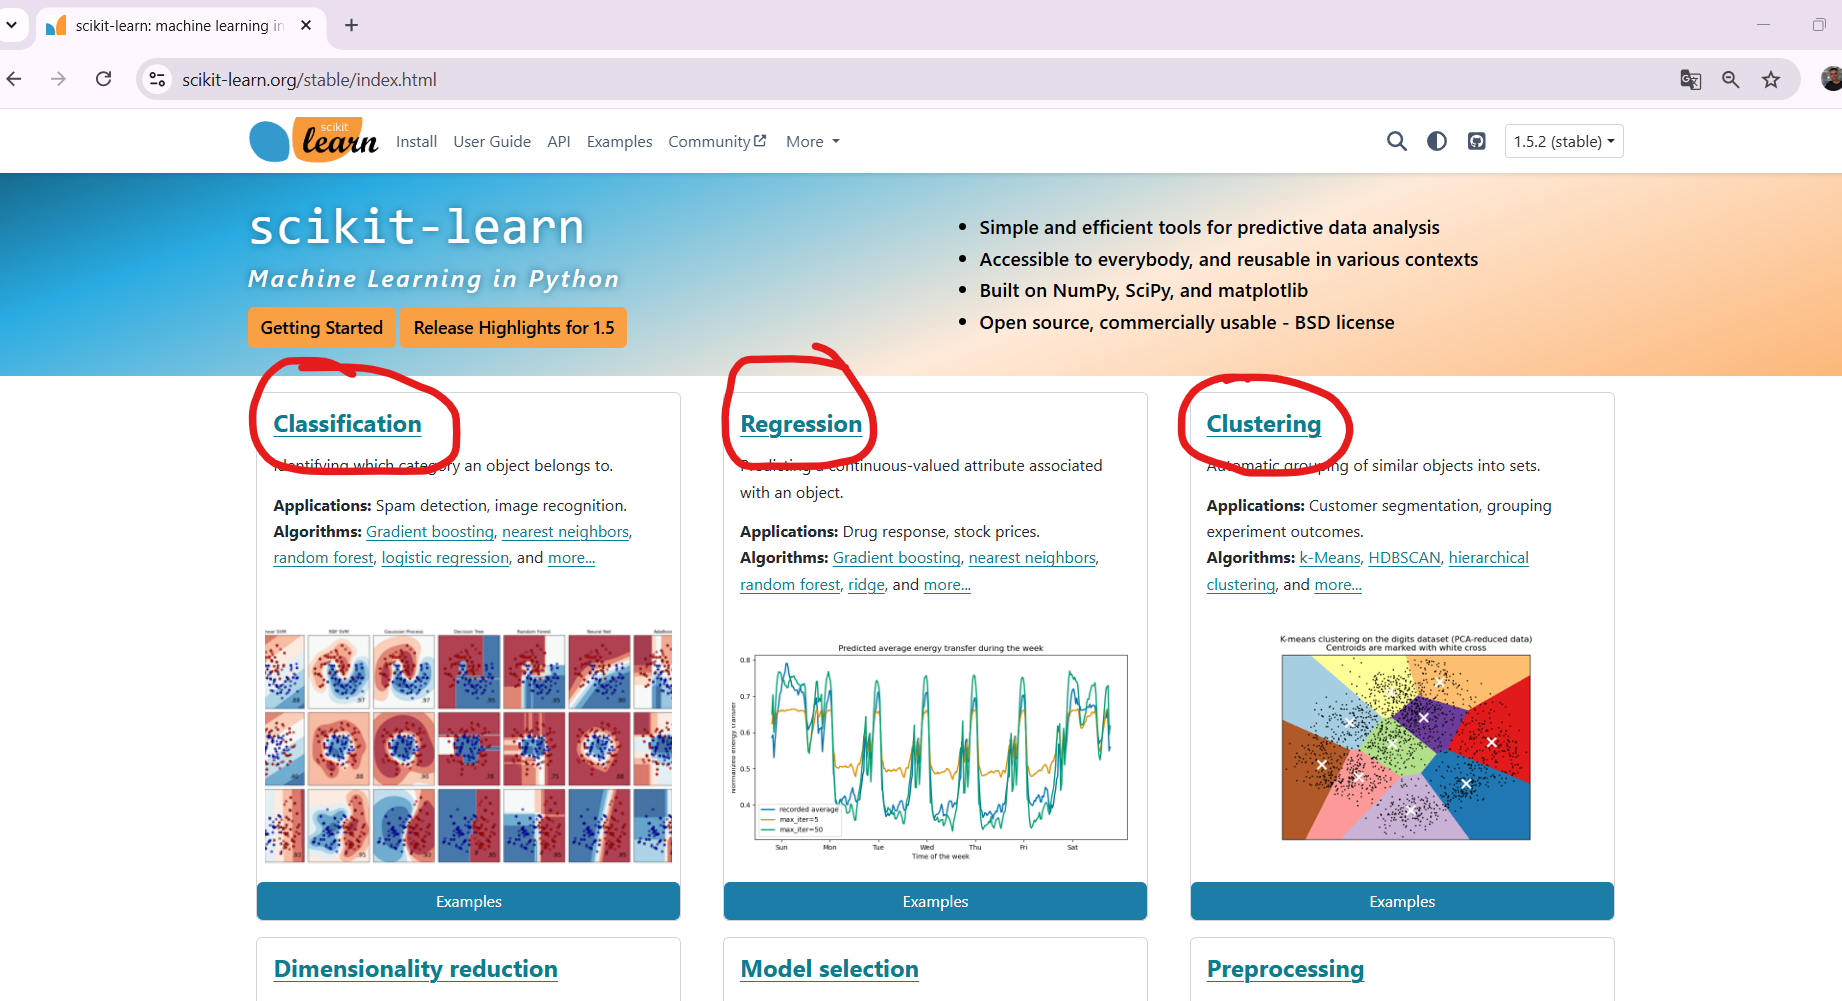

### **Normalizando os dados**

Os dois métodos mais comuns para normalização são:

- **Escalonamento Min-Max**: Transforma os valores para um intervalo entre 0 e 1.
- **Padronização (Z-score)**: Subtrai a média e divide pelo desvio padrão, resultando em uma distribuição com média 0 e desvio padrão 1.

Para esse caso, usaremos o *Min-Max Scaler* do scikit-learn, mas você também pode optar pelo StandardScaler para padronização, dependendo do modelo que planeja usar.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar todas as colunas do DataFrame
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

dados_normalizados

## **6. Divisão dos Dados em Treinamento e Teste**
Divida os dados em conjuntos de treinamento e teste para avaliação do modelo:

In [ ]:
# from sklearn.model_selection import train_test_split

X = dados_normalizados.drop('EMISSIONS', axis=1)
y = dados_normalizados['EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **7. Criação do Modelo de Regressão**
- **Regressão Linear**: Inicie com um modelo de Regressão Linear, que é um bom ponto de partida para problemas de regressão.

In [ ]:
# Criação do Modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

## **8. Avaliação do Modelo**
Utilize métricas de avaliação para medir a precisão do modelo, como Erro Médio Absoluto (`MAE`), Erro Quadrático Médio (`MSE`), e` R²`.

In [ ]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Previsões e Avaliação do Modelo de Regressão Linear
y_pred_linear = linear_model.predict(X_test)
print("Avaliação do Modelo de Regressão Linear:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R²:", r2_score(y_test, y_pred_linear))

### **Fazendo novas previsões**

**Passos para Inferir Novas Previsões**
- Preparar os Novos Dados: **Os dados precisam estar no mesmo formato que os dados usados para treinar o modelo**. Isso significa que, se você fez algum pré-processamento nos dados de treino (como normalização, tratamento de valores ausentes, codificação de variáveis categóricas), você precisa aplicar o mesmo pré-processamento aos dados novos.

- Usar o Modelo para Fazer Previsões: Depois de preparar os dados, você pode usar o método **predict** para obter as previsões.

**Passo 1: Dados Novos**

Suponha que você tenha novos dados em um DataFrame new_data e você quer usar o modelo treinado para fazer previsões.

In [ ]:
# Suponha que este seja o DataFrame com os novos dados
novos_dados = pd.DataFrame({
    'ENGINE SIZE': [2.0, 3.0],  # Novos valores para engine size
    'CYLINDERS': [4, 6],        # Novos valores para cylinters
    'FUEL CONSUMPTION': [10.5, 12.0],  # Novos valores para fuel consumption
    'HWY (L/100 km)': [7.7, 8.3],  # Novos valores para hwy
    'COMB (L/100 km)': [9.4, 10.2],   # Novos valores para comb
    'COMB (mpg)': [30.0, 28.5]   # Novos valores para comb mpg
})

novos_dados


**Passo 2: Aplicar Normalização:**

Se você usou MinMaxScaler ou outro tipo de escalonamento durante o treinamento, é necessário aplicar a mesma transformação aos novos dados.


In [ ]:
# Inicializar o MinMaxScaler
scaler2 = MinMaxScaler()

# Normalizar todas as colunas do DataFrame
novos_dados_normalizados = pd.DataFrame(scaler2.fit_transform(novos_dados), columns=novos_dados.columns)

novos_dados_normalizados

**Passo 3: Fazer Previsões:**

Após normalizar os dados, use o modelo de regressão linear treinado para gerar previsões.

In [ ]:
# Realiza as previsões com o modelo treinado
novas_previsoes = linear_model.predict(novos_dados_normalizados)

# Exibe as previsões
print("Previsões para os novos dados:", novas_previsoes)

## **9. Visualização dos Resultados**
- **Gráfico de Resíduos**: Mostre os resíduos para analisar a precisão do modelo.
- **Comparação Real x Predito**: Crie um gráfico de dispersão ou linha para comparar os valores reais e os valores preditos de CO2.

In [ ]:
# Visualização dos Resultados
# Comparação entre valores reais e preditos para o modelo Regressão Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valores Reais de CO2")
plt.ylabel("Valores Preditos de CO2")
plt.title("Comparação entre Valores Reais e Preditos de CO2 (Regressão Linear)")
plt.show()

# Gráfico de Resíduos para o Modelo Random Forest
residuos = y_test - y_pred_linear
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos (Regressão Linear)")
plt.xlabel("Erro")
plt.show()



---



## **10. Atividade Prática**
Alterem variáveis no dataset ou experimentem novos algoritmos para ver o impacto nas previsões de emissão de `CO2`.

**Dicas: Múltiplas Técnicas de Machine Learning**

**1. Classificação**

Podemos usar uma técnica de classificação para prever uma categoria baseada nas emissões de CO2, como “Baixa”, “Média” ou “Alta” emissão. Para isso, transformaremos o valor contínuo de emissões de CO2 em categorias.

> Transformar a coluna de emissões de `CO2` em **três classes** (Baixa, Média, Alta) usando `pd.cut()`.

> Usar um modelo de classificação de árvore de decisão (`DecisionTreeClassifier`) para prever a classe de emissão de `CO2` e avaliamos o modelo com acurácia e relatório de classificação.


**2. Regressão**

Podemos aplicar a regressão (já abordada antes) para prever o valor contínuo de emissões de `CO2` diretamente, mas agora com foco em comparar diferentes modelos de regressão.

> Manter o problema original de regressão para prever emissões de `CO2` em valores contínuos.

> Comparar dois modelos: Regressão Linear e Random Forest Regressor, avaliando-os com métricas como `MAE, MSE e R²`.

**3. Agrupamento (Clustering)**

Podemos utilizar técnicas de agrupamento para segmentar os automóveis em grupos com características similares. Esse tipo de análise pode ser útil para observar padrões dentro do conjunto de dados, como grupos de carros com características parecidas de potência, tamanho do motor e emissão de `CO2`.

> Padronizar as variáveis do dataset e aplicamos o algoritmo KMeans para segmentar os veículos em três grupos (ou clusters).

> Utilizar o `PCA` (Principal Component Analysis) para reduzir a dimensionalidade e visualizar os clusters em duas dimensões.

> Mostrar exemplos de veículos pertencentes a cada cluster para análise qualitativa dos grupos formados.